In [3]:
import os
import kagglehub
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16, InceptionV3, ResNet50
path = kagglehub.dataset_download("fuyadhasanbhoyan/knee-osteoarthritis-classification-224224")

classification_folder = os.path.join(path, 'Knee Osteoarthritis Classification')
train_path = os.path.join(classification_folder, 'train')
val_path = os.path.join(classification_folder, 'val')
test_path = os.path.join(classification_folder, 'test')

print(f"Train path: {train_path}")
print(f"Validation path: {val_path}")
print(f"Test path: {test_path}")





Train path: /kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification/train
Validation path: /kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification/val
Test path: /kaggle/input/knee-osteoarthritis-classification-224224/Knee Osteoarthritis Classification/test


In [4]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 3780 images belonging to 3 classes.
Found 1080 images belonging to 3 classes.
Found 540 images belonging to 3 classes.


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training VGG16 model...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 62s 407ms/step - accuracy: 0.4048 - loss: 1.1173 - val_accuracy: 0.5009 - val_loss: 0.9831
Epoch 2/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 25s 208ms/step - accuracy: 0.5629 - loss: 0.9116 - val_accuracy: 0.5287 - val_loss: 0.9419
Epoch 3/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 25s 208ms/step - accuracy: 0.5862 - loss: 0.8620 - val_accuracy: 0.6269 - val_loss: 0.8916
Epoch 4/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 25s 209ms/step - accuracy: 0.6329 - loss: 0.8060 - val_accuracy: 0.6194 - val_loss: 0.8855
Epoch 5/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 25s 209ms/step - accuracy: 0.6307 - loss: 0.8022 - val_accuracy: 0.6361 - val_loss: 0.8617
Epoch 6/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 25s 209ms/step - accuracy: 0.6250 - loss: 0.7870 - val_accuracy: 0.6231 - val_loss: 0.8594
Epoch 7/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 30s 248ms/step - accuracy: 0.6479 - loss: 0.7674 - val_accuracy: 0.6731 - val_loss: 0.8420
Epoch 8/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 25s 208ms/step - accuracy: 0.6379 - loss: 0

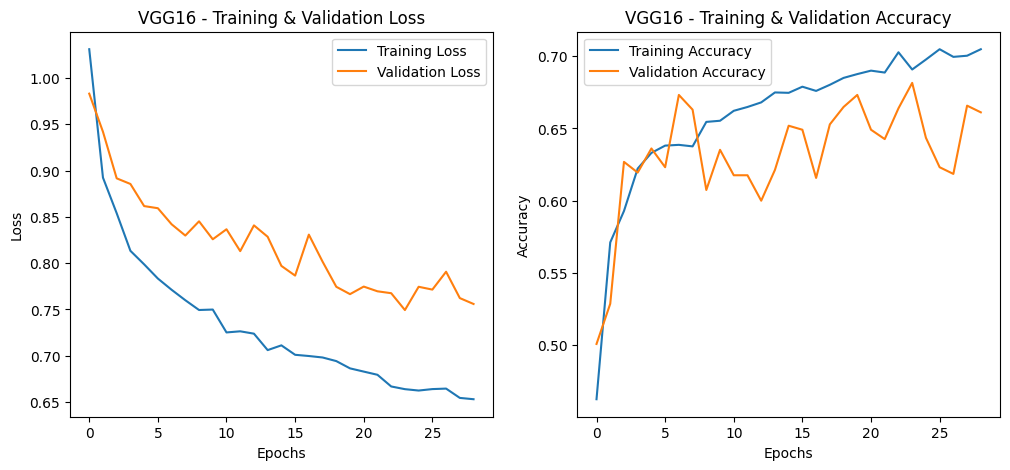

17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 795ms/step - accuracy: 0.5602 - loss: 0.7788
Test Accuracy: 0.72
Test Loss: 0.64
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 189ms/step
Classification Report:

              precision    recall  f1-score   support

      Normal       0.89      0.49      0.63       180
  Osteopenia       0.77      0.87      0.82       180
Osteoporosis       0.60      0.79      0.68       180

    accuracy                           0.72       540
   macro avg       0.75      0.72      0.71       540
weighted avg       0.75      0.72      0.71       540



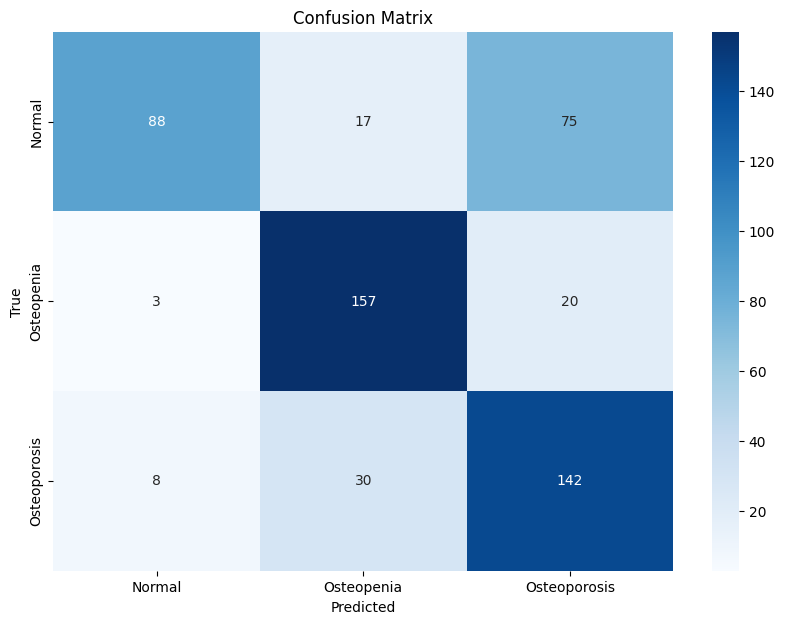

Loading VGG16 model...

Loaded VGG16 Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,110,987 (57.64 MB)

 Trainable params: 132,099 (516.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 264,200 (1.01 MB)

Training InceptionV3 model...
Epoch 1/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 45s 247ms/step - accuracy: 0.4814 - loss: 1.2588 - val_accuracy: 0.5806 - val_loss: 0.8996
Epoch 2/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.6059 - loss: 0.8220 - val_accuracy: 0.6315 - val_loss: 0.8458
Epoch 3/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.6650 - loss: 0.7631 - val_accuracy: 0.6213 - val_loss: 0.8539
Epoch 4/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.6582 - loss: 0.7524 - val_accuracy: 0.6370 - val_loss: 0.8517
Epoch 5/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.6663 - loss: 0.7485 - val_accuracy: 0.6528 - val_loss: 0.8232
Epoch 6/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.6898 - loss: 0.7181 - val_accuracy: 0.6157 - val_loss: 0.8328
Epoch 7/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.6804 - loss: 0.7100 - val_accuracy: 0.6259 - val_loss: 0.8497
Epoch 8/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - acc

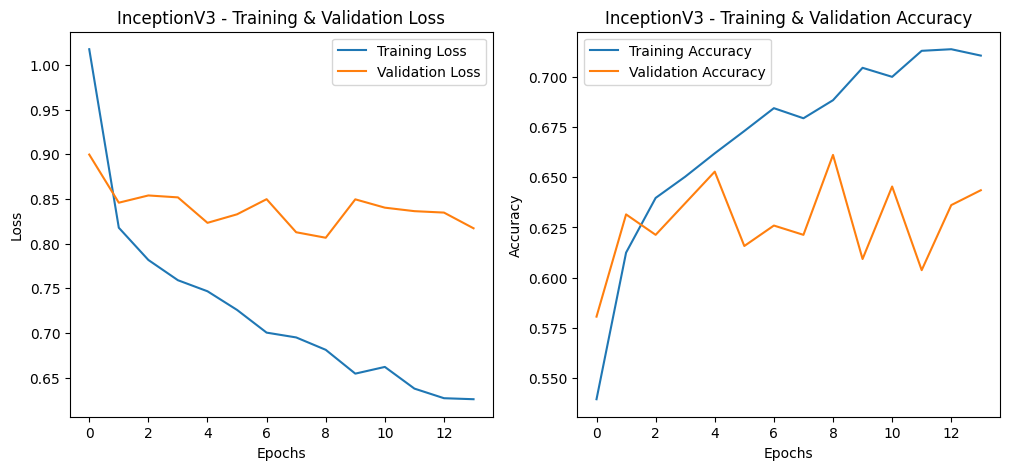

17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 469ms/step - accuracy: 0.5977 - loss: 0.7733
Test Accuracy: 0.72
Test Loss: 0.67
17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 426ms/step
Classification Report:

              precision    recall  f1-score   support

      Normal       0.81      0.56      0.66       180
  Osteopenia       0.73      0.89      0.80       180
Osteoporosis       0.65      0.70      0.67       180

    accuracy                           0.72       540
   macro avg       0.73      0.72      0.71       540
weighted avg       0.73      0.72      0.71       540



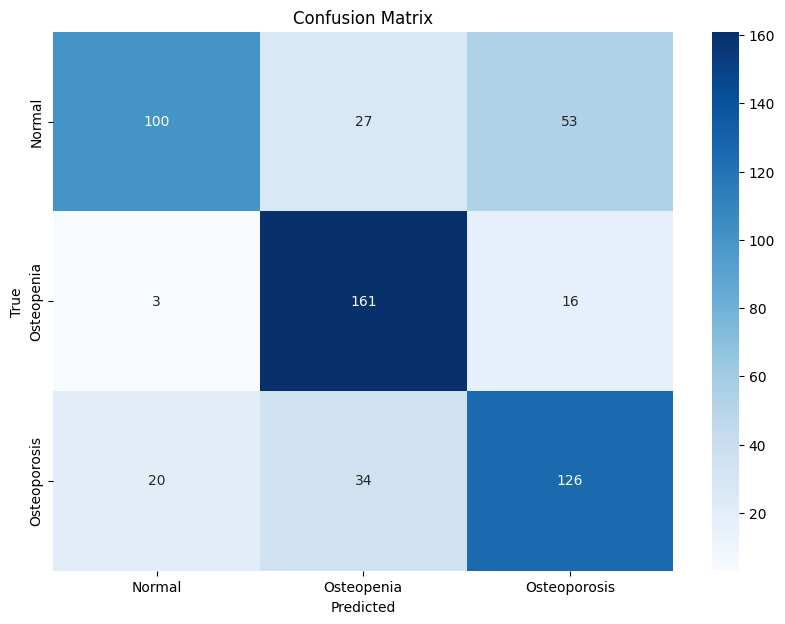

Loading InceptionV3 model...

Loaded InceptionV3 Model Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 5, 5, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,378,731 (89.18 MB)

 Trainable params: 525,315 (2.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

 Optimizer params: 1,050,632 (4.01 MB)

Training ResNet50 model...
Epoch 1/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 37s 207ms/step - accuracy: 0.3802 - loss: 1.2034 - val_accuracy: 0.4269 - val_loss: 1.0668
Epoch 2/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 108ms/step - accuracy: 0.3972 - loss: 1.0778 - val_accuracy: 0.3333 - val_loss: 1.1351
Epoch 3/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 110ms/step - accuracy: 0.4136 - loss: 1.0843 - val_accuracy: 0.5093 - val_loss: 1.0433
Epoch 4/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 108ms/step - accuracy: 0.4679 - loss: 1.0451 - val_accuracy: 0.5278 - val_loss: 1.0259
Epoch 5/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 107ms/step - accuracy: 0.4862 - loss: 1.0102 - val_accuracy: 0.5759 - val_loss: 1.0072
Epoch 6/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 107ms/step - accuracy: 0.4743 - loss: 1.0218 - val_accuracy: 0.5787 - val_loss: 0.9910
Epoch 7/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 107ms/step - accuracy: 0.4920 - loss: 1.0032 - val_accuracy: 0.5222 - val_loss: 0.9912
Epoch 8/60
119/119 ━━━━━━━━━━━━━━━━━━━━ 13s 107ms/step -

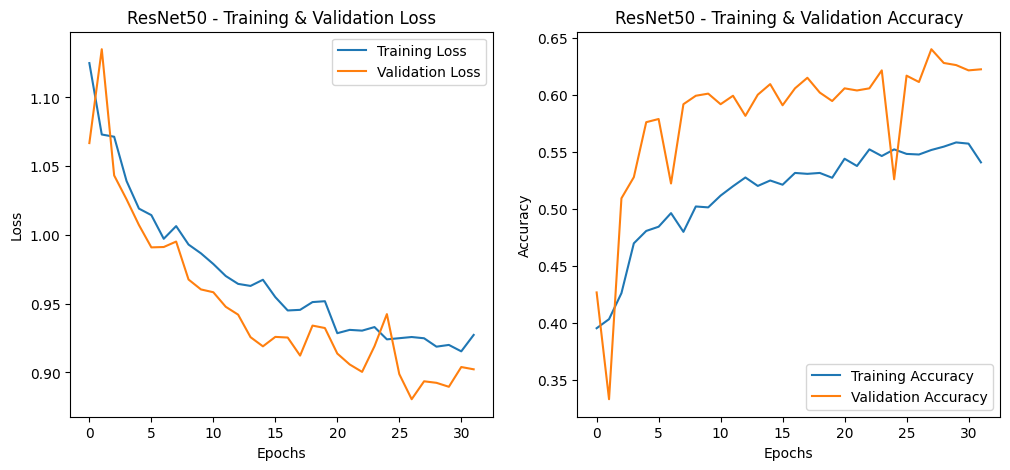

17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 336ms/step - accuracy: 0.4304 - loss: 0.9008
Test Accuracy: 0.63
Test Loss: 0.82
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 344ms/step
Classification Report:

              precision    recall  f1-score   support

      Normal       0.77      0.31      0.44       180
  Osteopenia       0.74      0.82      0.78       180
Osteoporosis       0.50      0.75      0.60       180

    accuracy                           0.63       540
   macro avg       0.67      0.63      0.61       540
weighted avg       0.67      0.63      0.61       540



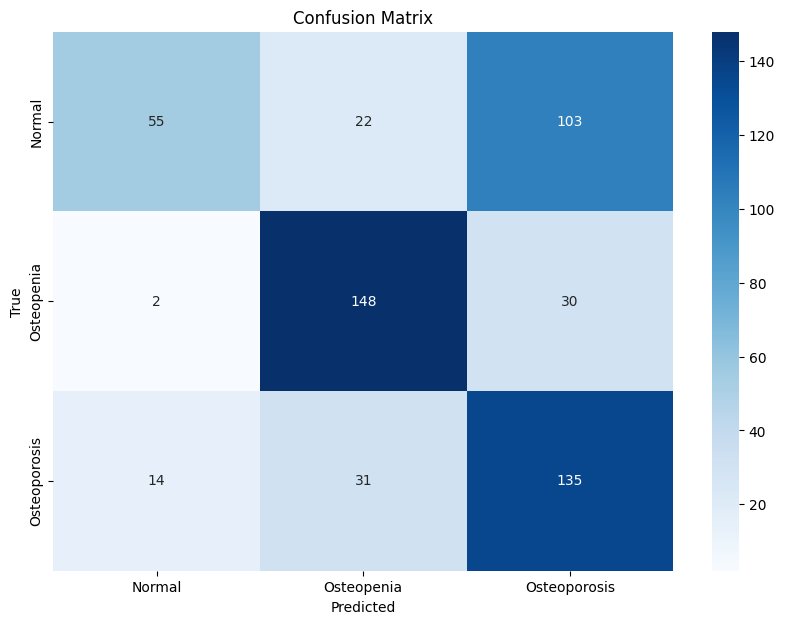

Loading ResNet50 model...

Loaded ResNet50 Model Architecture:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,163,659 (95.99 MB)

 Trainable params: 525,315 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 1,050,632 (4.01 MB)

In [5]:


base_models = {
    "VGG16": VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    "InceptionV3": InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    "ResNet50": ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
}

def NameModel(base_model):
    base_model.trainable = False
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(3, activation='softmax')
    ])


    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

for model_name, base_model in base_models.items():
    print(f"Training {model_name} model...")

    model = NameModel(base_model)

    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=60,
        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
    )



    model.save(f"/content/{model_name}_KneeOsteo_DeepModel.keras")
    print(f"{model_name} training complete! Model saved.")



    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'{model_name} - Training & Validation Loss')


    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'{model_name} - Training & Validation Accuracy')

    plt.show()



    test_loss, test_acc = model.evaluate(test_generator)
    print(f'Test Accuracy: {test_acc:.2f}')
    print(f'Test Loss: {test_loss:.2f}')

    y_true = test_generator.classes
    y_pred = model.predict(test_generator)
    y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

    print("Classification Report:\n")
    print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))





    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()


    print(f"Loading {model_name} model...")
    loaded_model = tf.keras.models.load_model(f"/content/{model_name}_KneeOsteo_DeepModel.keras")
    print(f"\nLoaded {model_name} Model Architecture:")
    loaded_model.summary()

